In [34]:
library(data.table)
library(dplyr)
library(tidyr)
library(forcats)
library(ggplot2)
library(cowplot)
library(ggsci)

In [35]:
fname <- "../data/benchmark/multiple/res1.txt"

In [36]:
d <- fread(fname) %>%
    mutate(
        AICc = -2*LLIK + 2*nsig*(nsig+1) / max(1, nmut - nsig - 1),
        AIC = -2*LLIK + 2*nsig
    ) %>%
    mutate(
        sigtype = as.factor(sigtype),
        nsig = cut(nsig, breaks=c(0, 2,  4,   6,   8,   10)),
        nmut = cut(nmut, breaks=c(0, 50, 150, 300, 600, 999)),
        method = factor(method, levels=c('aicc', 'aiccz', 'mle', 'ds')),
    ) %>%
    filter(
        sigtype == 30,
        method %in% c('aicc', 'aiccz', 'mle', 'ds')
    ) %>%
    mutate(
        method = fct_recode(method,
#            'target' = "original",
            "AICc" = "aicc",
            "dSigs" = "ds",
           "AICcZ" = "aiccz",
           "MLE" = "mle"
          )
    )
# head(d %>% filter(method == "AICcZ"))
head(d)


file_id,sigtype,nsig,nmut,method,SRMSE,PRMSE,STRMSE,LLIK,LLIK0,TLLIK,TLLIK0,precision,recall,accuracy,f1,AICc,AIC
30_10_102_0d37,30,"(6,8]","(50,150]",MLE,0.04273800,0.007942918,0.04982944,-408.9919,-414.3900,-434.8213,-428.9672,0.6666667,0.5714286,0.8333333,0.6153846,818.0965,831.9838
30_10_102_0d37,30,"(6,8]","(50,150]",dSigs,0.04535400,0.007902138,0.04335330,-410.2074,-414.3900,-429.2507,-428.9672,0.8333333,0.7142857,0.9000000,0.7692308,820.5275,834.4148
30_10_102_0d37,30,"(6,8]","(50,150]",AICc,0.05144394,0.007685452,0.05053146,-409.9495,-414.3900,-423.2321,-428.9672,0.7142857,0.7142857,0.8666667,0.7142857,820.0117,833.8990
30_10_102_0d37,30,"(6,8]","(50,150]",AICcZ,0.05393009,0.007923894,0.05370490,-428.0604,-414.3900,-455.3468,-428.9672,0.8000000,0.5714286,0.8666667,0.6666667,856.2335,870.1208
30_10_107_cbb4,30,"(2,4]","(50,150]",MLE,0.04244958,0.008730808,0.03571948,-412.1862,-421.3202,-446.3197,-458.7752,0.7500000,0.7500000,0.9333333,0.7500000,824.4126,832.3723
30_10_107_cbb4,30,"(2,4]","(50,150]",dSigs,0.05295513,0.008414987,0.05043200,-416.6951,-421.3202,-428.2025,-458.7752,0.4000000,0.5000000,0.8333333,0.4444444,833.4304,841.3902


In [37]:
summary(d$nsig)

(0,2]  (2,4]  (4,6]  (6,8] (8,10] 
   469   1233   2151   1873    275

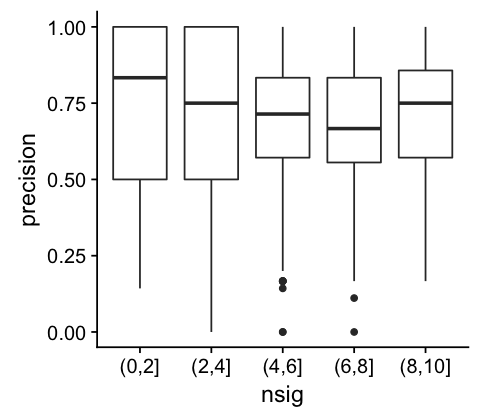

In [38]:
options(repr.plot.width=4, repr.plot.height=3.5)

ggplot(d %>% filter(method=="AICc")) +
geom_boxplot(aes(x=nsig, y=precision))

#boxplot(STRMSE ~ nsig, data = d %>% filter(method=="AICcZ"))
#boxplot(accuracy ~ nmut, data = d %>% filter(method=="AICcZ"))
# plot(as.numeric(nmut) ~ as.numeric(nsig), color=d$accuracy, data=d)

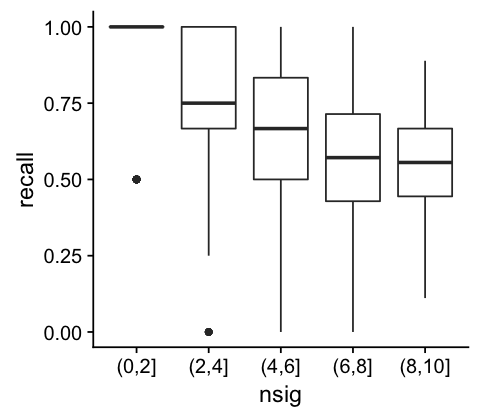

In [39]:
options(repr.plot.width=4, repr.plot.height=3.5)

ggplot(d %>% filter(method=="AICc")) +
geom_boxplot(aes(x=nsig, y=recall))

#boxplot(STRMSE ~ nsig, data = d %>% filter(method=="AICcZ"))
#boxplot(accuracy ~ nmut, data = d %>% filter(method=="AICcZ"))
# plot(as.numeric(nmut) ~ as.numeric(nsig), color=d$accuracy, data=d)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


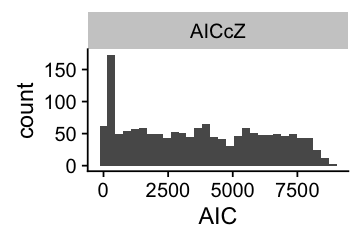

In [7]:
options(repr.plot.width=3, repr.plot.height=2)

ggplot(d %>% filter(method=="AICcZ")) + geom_histogram(aes(AIC)) + facet_wrap(~method)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


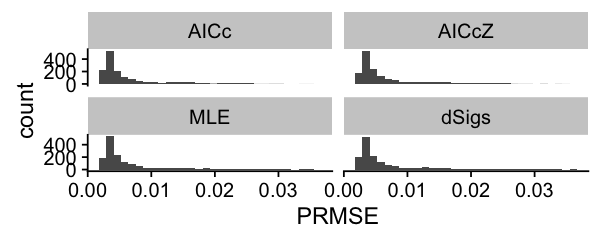

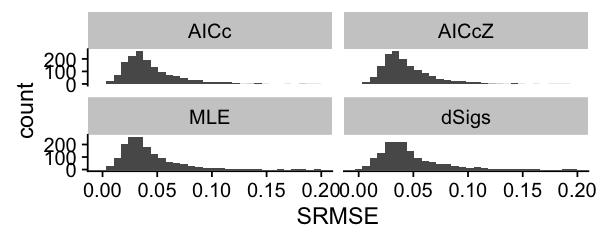

In [8]:
options(repr.plot.width=5, repr.plot.height=2)
ggplot(d) + geom_histogram(aes(PRMSE)) + facet_wrap(~method)

options(repr.plot.width=5, repr.plot.height=2)
ggplot(d) + geom_histogram(aes(SRMSE)) + facet_wrap(~method)

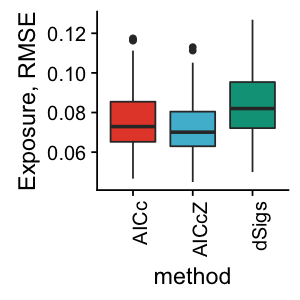

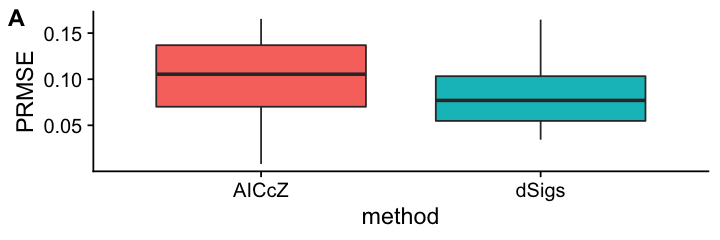

In [9]:
options(repr.plot.width=2.5, repr.plot.height=2.5)
plot_grid(
          ggplot(d %>% filter(
              method != 'MLE' &
                nsig == '(6,8]' & nmut == '(0,50]'
          )) +
          geom_boxplot(aes(y=SRMSE, x=method, fill=method), show.legend=F) +
          theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
          scale_fill_npg() +
          ylab("Exposure, RMSE"),
          labels = c(" ")) #, align = "h", ncol=3)

options(repr.plot.width=6, repr.plot.height=2)
plot_grid(
          ggplot(d %>% filter(
              method != 'MLE' & method != 'AICc' &
              nsig == '(0,2]' & nmut == '(0,50]'
          )) +
          geom_boxplot(aes(y=SRMSE, x=method, fill=method), show.legend=F) +
          ylab("PRMSE"),
          labels = c("A")) #, align = "h", ncol=3)


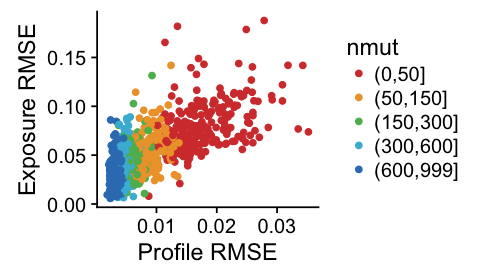

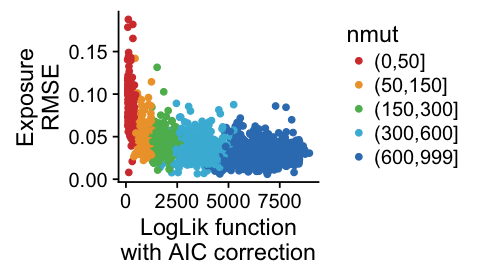

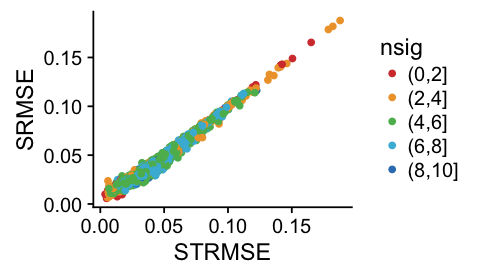

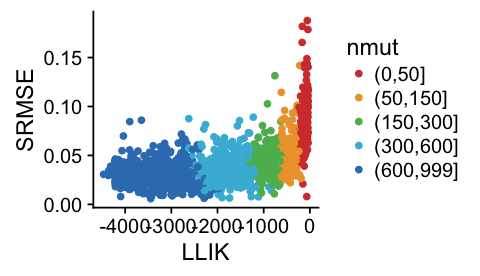

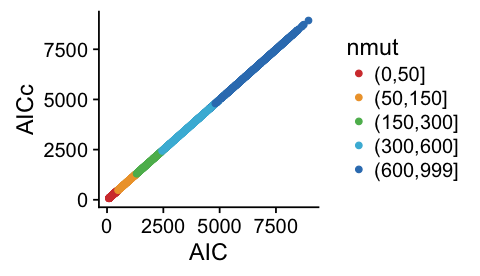

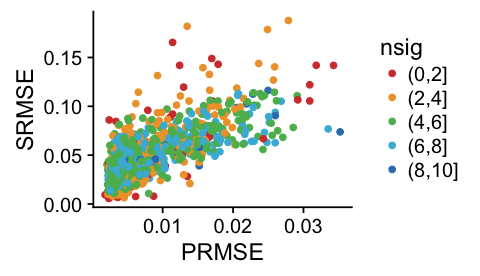

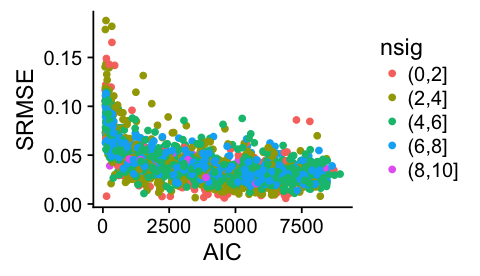

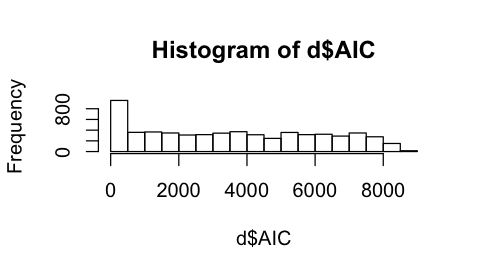

In [42]:
options(repr.plot.width=4, repr.plot.height=2.3)

ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=SRMSE, x=PRMSE, color=nmut), show.legend=T) + 
        xlab("Profile RMSE") +
        ylab("Exposure RMSE") +
        scale_color_locuszoom()

ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=SRMSE, x=AIC, color=nmut), show.legend=T) +
        xlab("LogLik function\nwith AIC correction") +
        ylab("Exposure\nRMSE") +
        scale_color_locuszoom()



ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=SRMSE, x=STRMSE, color=nsig), show.legend=T) + 
                scale_color_locuszoom()



ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=SRMSE, x=LLIK, color=nmut), show.legend=T) +
        scale_color_locuszoom()


ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=AICc, x=AIC, color=nmut), show.legend=T) +
        scale_color_locuszoom()

ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=SRMSE, x=PRMSE, color=nsig), show.legend=T) + 
        scale_color_locuszoom()


ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=SRMSE, x=AIC, color=nsig), show.legend=T)

hist(d$AIC)

In [61]:

# d %>%
    # filter(nmut == '(50,150]' & nsig == '(6,8]' & sigtype == 30 & method != 'mlez') %>%
#     spread(key = file_id, method, SRMSE)


file_id,AICc,AICcZ,MLE,dSigs
30_10_102_0d37,0.05144394,0.05393009,0.04273800,0.04535400
30_10_107_cbb4,0.04809015,0.04741818,0.04244958,0.05295513
30_10_11_4ee9,0.06600973,0.06267093,0.05797142,0.12073987
30_10_116_c813,0.06821922,0.06442874,0.06942692,0.06559996
30_10_118_2938,0.02764420,0.02830063,0.02638919,0.03213085
30_10_12_973a,0.11661973,0.07682394,0.11135769,0.12424252
30_10_132_b836,0.05245483,0.05295562,0.05935307,0.05834914
30_10_15_c3cf,0.09221435,0.09221435,0.09335716,0.10367618
30_10_153_ebc4,0.05348810,0.05127801,0.05348810,0.04747055
30_10_158_3ec8,0.03145969,0.02948423,0.02405237,0.03237188


Warning message:
“Removed 4 rows containing missing values (geom_point).”

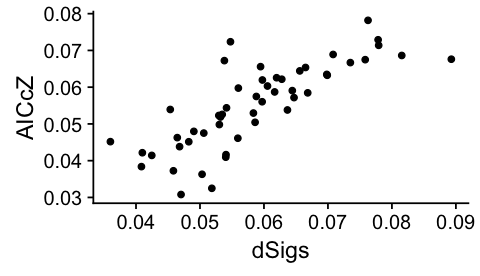

Warning message:
“Removed 5 rows containing missing values (geom_point).”

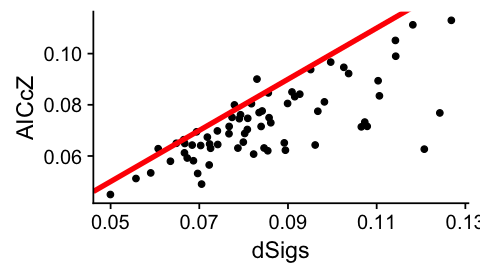

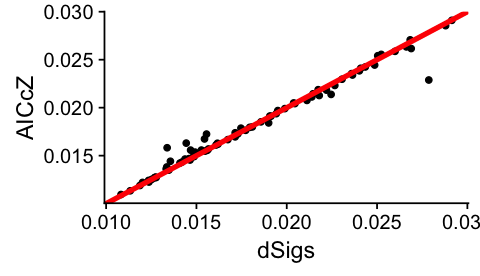

In [83]:
ggplot(d %>%
    filter(nmut == '(50,150]' & nsig == '(6,8]' & sigtype == 30 & method != 'mlez') %>%
    select(file_id, method, SRMSE) %>% spread(method, SRMSE)) +
    geom_point(aes(y=AICcZ, x=dSigs))


ggplot(d %>%
    filter(nmut == '(0,50]' & nsig == '(6,8]'& sigtype == 30 & method != 'mlez') %>%
    select(file_id, method, SRMSE) %>% spread(method, SRMSE)) +
    geom_point(aes(y=AICcZ, x=dSigs)) +
 geom_abline(intercept = 0, slope=1, linetype="solid", color = "red", size=1.5)

ggplot(d %>%
    filter(nmut == '(0,50]' & nsig == '(4,6]'& sigtype == 30 & method != 'mlez') %>%
    select(file_id, method, PRMSE) %>% spread(method, PRMSE)) +
    geom_point(aes(y=AICcZ, x=dSigs)) +
geom_abline(intercept = 0, slope=1, linetype="solid",  color = "red", size=1.5)


In [ ]:
#### options(repr.plot.width=4, repr.plot.height=2.3)

d %>% filter(sigtype==30, nsig='6,8]', method == 'AICcZ')

# plot(d[d$method == 'AICcZ', 'SRMSE'], d[d$method == 'dSigs', 'SRMSE'])


ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=SRMSE, x=PRMSE, color=nmut), show.legend=T) + 
        xlab("Profile RMSE") +
        ylab("Exposure RMSE") +
        scale_color_locuszoom()



ggplot(d %>% filter(method == 'dSigs')) +
          geom_point(aes(y=SRMSE, x=PRMSE, color=nmut), show.legend=T) + 
        xlab("Profile RMSE") +
        ylab("Exposure RMSE") +
        scale_color_locuszoom()



In [ ]:
options(repr.plot.width=4, repr.plot.height=2)

ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=f1, x=PRMSE, color=nmut), show.legend=T) + 
        ylab("F score") + 
        scale_color_locuszoom()

ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=f1, x=SRMSE, color=nmut), show.legend=T) +
        ylab("Active signatures\n F1 score") + 
        xlab("Signature contributions, RMSE") + 
        scale_color_locuszoom()


ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=f1, x=PRMSE, color=nsig), show.legend=T) + 
        ylab("F score") + 
         scale_color_brewer(type="seq",palette = "Greys")

ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=f1, x=SRMSE, color=nsig), show.legend=T) +
        ylab("F score") + 
         scale_color_brewer(type="seq",palette = "OrRd")

In [ ]:
ggplot(d %>% filter(method == 'AICcZ')) +
          geom_point(aes(y=precision, x=recall, color=nmut), show.legend=T) + 
        scale_color_locuszoom()

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


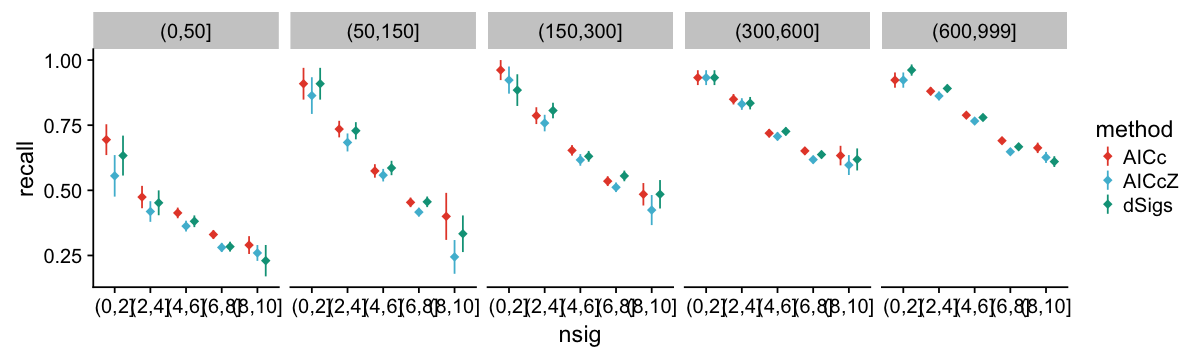

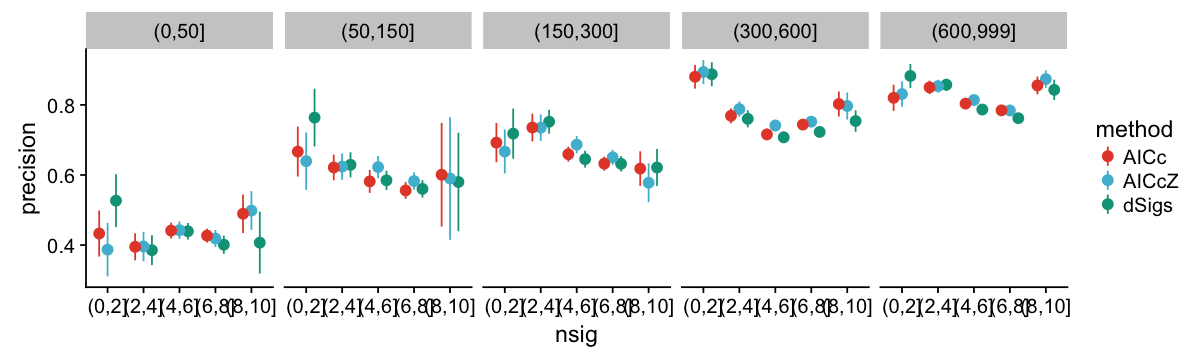

In [11]:
# library(Hmisc)

options(repr.plot.width=10, repr.plot.height=3)

ggplot(d %>% filter(method != "MLE"), aes(y=recall, nsig, color=method)) +
    stat_summary(show.legend=T, na.rm=TRUE, position=position_dodge(width=0.7), shape=18) + 
        scale_color_npg() +
facet_wrap(~nmut, nrow=1)

options(repr.plot.width=10, repr.plot.height=3)

ggplot(d %>% filter(method != "MLE"), aes(y=precision, nsig, color=method)) +
    stat_summary(show.legend=T, na.rm=TRUE, fun.data = "mean_se", position=position_dodge(width=0.7)) + 
    scale_color_npg() +
facet_wrap(~nmut, nrow=1)



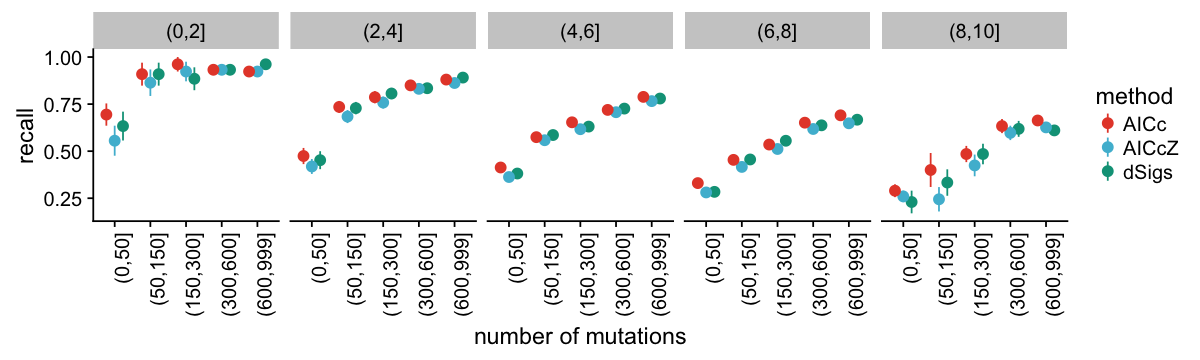

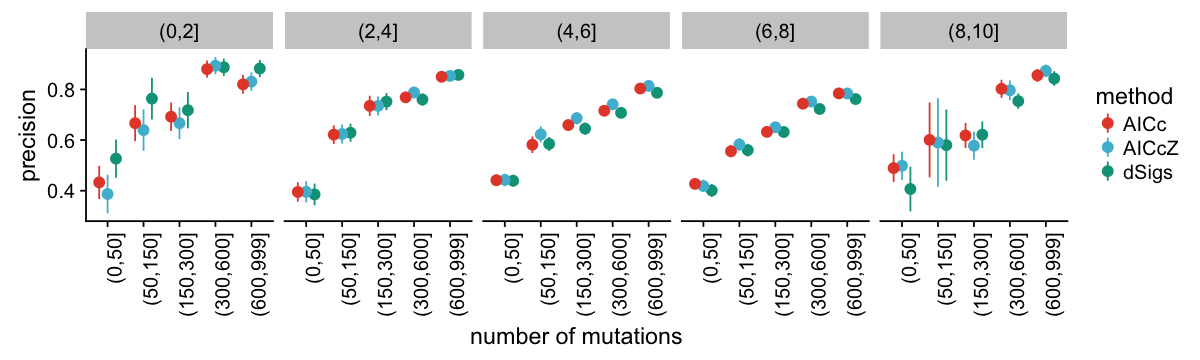

In [12]:
options(repr.plot.width=10, repr.plot.height=3)

ggplot(d %>% filter(method != "MLE"), aes(y=recall, nmut, color=method)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    stat_summary(show.legend=T, na.rm=TRUE, fun.data = "mean_se", position=position_dodge(width=0.7)) + 
    scale_color_npg() +
    xlab("number of mutations") +
facet_wrap(~nsig, nrow=1)


ggplot(d %>% filter(method != "MLE"), aes(y=precision, nmut, color=method)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    stat_summary(show.legend=T, na.rm=TRUE, fun.data = "mean_se", position=position_dodge(width=0.7)) + 
        scale_color_npg() +
    xlab("number of mutations") +
facet_wrap(~nsig, nrow=1)




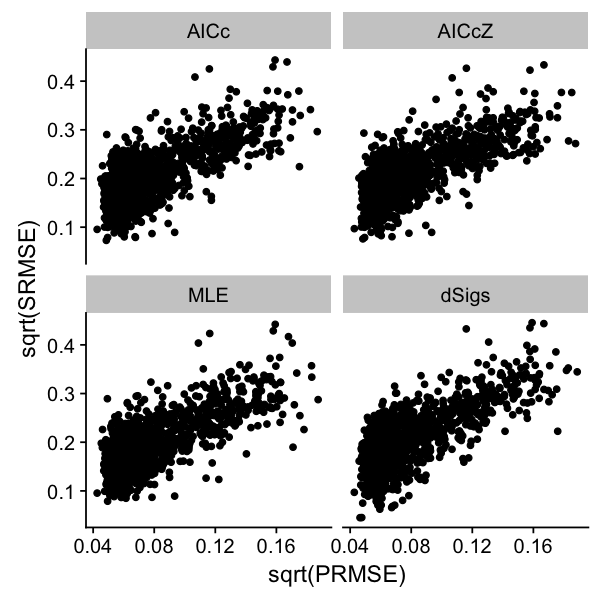

In [13]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(d) +
geom_point(aes(sqrt(PRMSE), sqrt(SRMSE))) + 
facet_wrap(~method)

In [14]:
# a <- d %>% filter(sigtype==30) %>% 
#     select(nsig, nmut, method, PRMSE) %>%
#     group_by(nsig, nmut) %>%
#     spread(method, PRMSE) 

# a
# ggplot(a, aes(x=ds, y=)) + 

# d3 <- d  %>% spread(method, LLIK) %>%
# mutate(
#     ds=ds - LLIK0,
#     mle = mle - LLIK0,
#     mlez = mlez - LLIK0) %>%
# gather(key = method, value, ds, mle, mlez, na.rm = TRUE)



ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$setup(layer_data, plot$

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$setup(layer_data, plot$

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$setup(layer_data, plot$

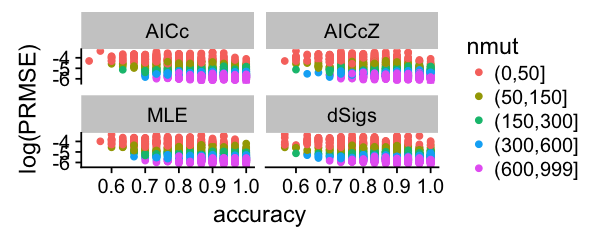

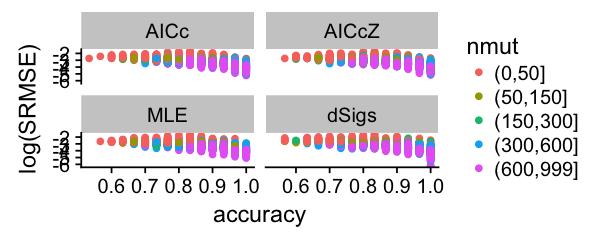

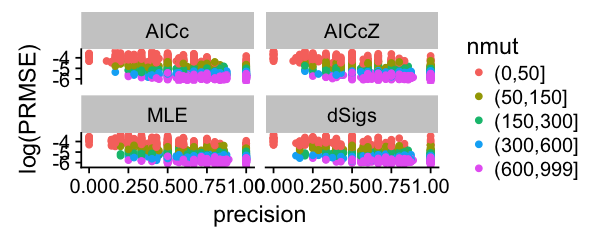

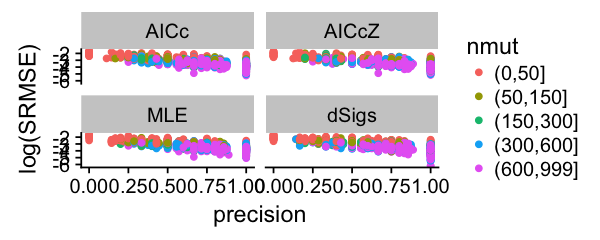

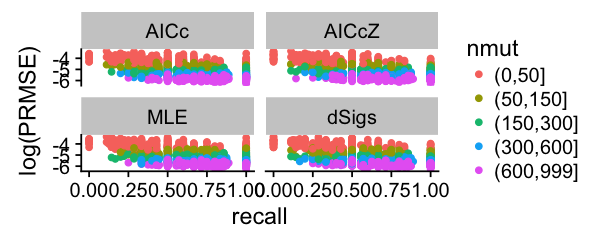

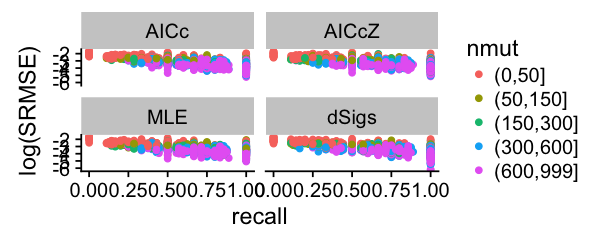

In [15]:
options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==5)) +
geom_point(aes(LLIK/nmut, SRMSE, color=nmut)) + 
facet_wrap(~method)

options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==5)) +
geom_point(aes(LLIK, log(PRMSE), color=nmut)) +
facet_wrap(~method)

options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==5)) +
geom_point(aes(LLIK, log(SRMSE), color=nmut)) +
facet_wrap(~method)


options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(accuracy, log(PRMSE), color=nmut)) +
facet_wrap(~method)


options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(accuracy, log(SRMSE), color=nmut)) +
facet_wrap(~method)


options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(precision, log(PRMSE), color=nmut)) +
facet_wrap(~method)


options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(precision, log(SRMSE), color=nmut)) +
facet_wrap(~method)


options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(recall, log(PRMSE), color=nmut)) +
facet_wrap(~method)


options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(recall, log(SRMSE), color=nmut)) +
facet_wrap(~method)


# options(repr.plot.width=3, repr.plot.height=2)
# ggplot(d %>% filter(sigtype==5 & method=='ds')) +
# geom_point(aes(LLIK, log(PMSE), color=nmut))

Warning message in Ops.factor(LLIK0, nmut):
“‘/’ not meaningful for factors”Warning message in Ops.factor(LLIK, nmut):
“‘/’ not meaningful for factors”Warning message in Ops.factor(LLIK0, nmut):
“‘/’ not meaningful for factors”Warning message in Ops.factor(LLIK, nmut):
“‘/’ not meaningful for factors”

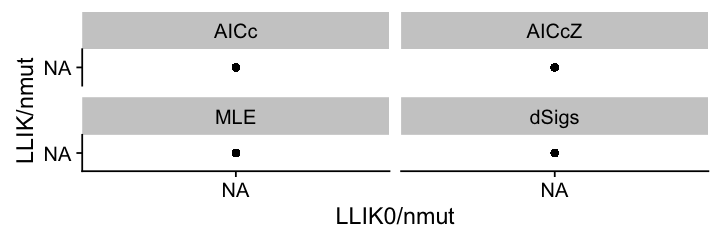

In [16]:
options(repr.plot.width=6, repr.plot.height=2)
ggplot(d) +
geom_point(aes(LLIK0/nmut, LLIK/nmut)) + 
facet_wrap(~method)

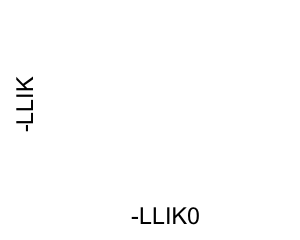

In [17]:
options(repr.plot.width=2.5, repr.plot.height=2)
ggplot(d %>% filter(method=="mle")) +
geom_point(aes(-LLIK0, -LLIK))


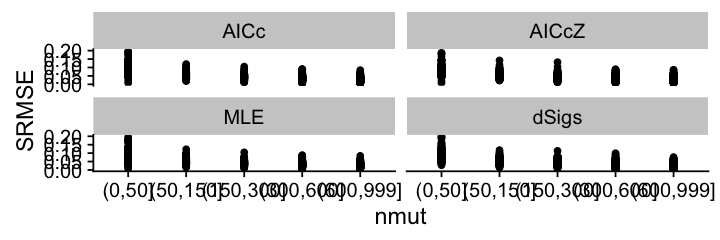

In [18]:
options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(nmut, SRMSE)) + 
facet_wrap(~method)

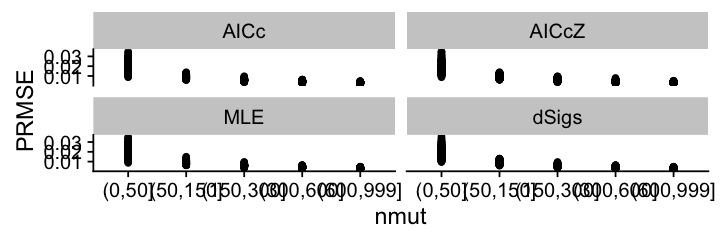

In [19]:
options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(nmut, PRMSE)) + 
facet_wrap(~method)

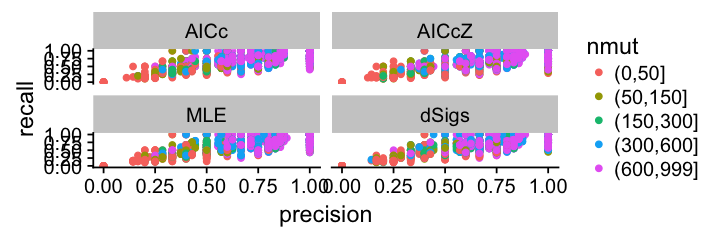

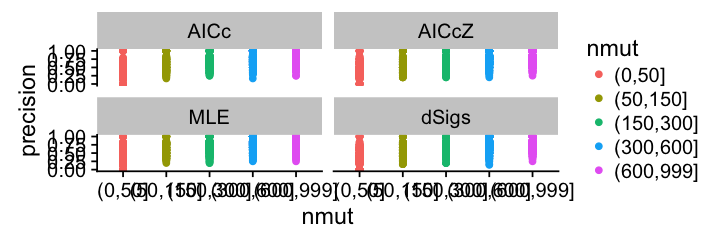

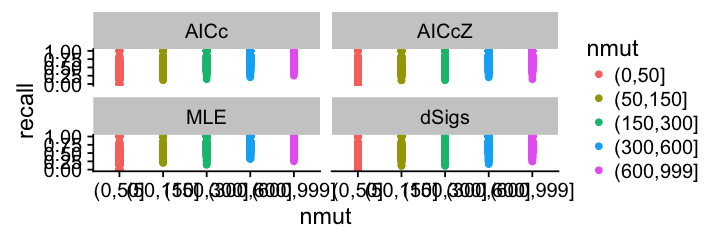

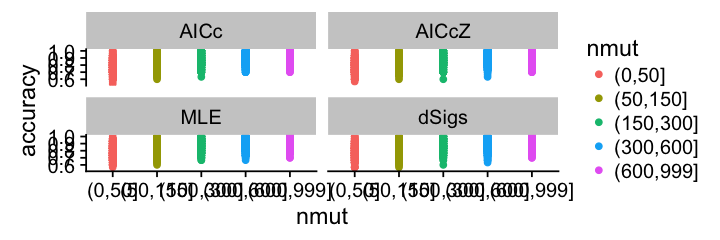

In [20]:
options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(precision, recall, color=nmut)) + 
facet_wrap(~method)

options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(nmut, precision, color=nmut)) + 
facet_wrap(~method)


options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(nmut, recall, color=nmut)) + 
facet_wrap(~method)

options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30)) +
geom_point(aes(nmut, accuracy, color=nmut)) + 
facet_wrap(~method)

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$setup(layer_data, plot$

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$setup(layer_data, plot$

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$setup(layer_data, plot$

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. layout$setup(layer_data, plot$

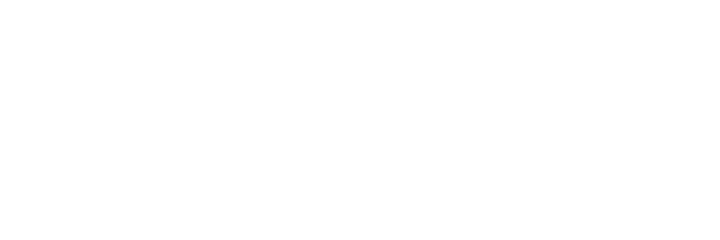

In [21]:
options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig==10)) +
geom_point(aes(precision, recall, color=nmut)) + 
facet_wrap(~method)

options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig==10)) +
geom_point(aes(nmut, precision, color=nmut)) + 
facet_wrap(~method)


options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig==10)) +
geom_point(aes(nmut, recall, color=nmut)) + 
facet_wrap(~method)

options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig==5)) +
geom_point(aes(nmut, accuracy, color=nmut)) + 
facet_wrap(~method)

Warning message in Ops.factor(nsig, 2):
“‘>=’ not meaningful for factors”ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16.

Warning message in Ops.factor(nsig, 2):
“‘>=’ not meaningful for factors”ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16.

Warning message in Ops.factor(nsig, 2):
“‘>=’ not meaningful for factors”ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16.

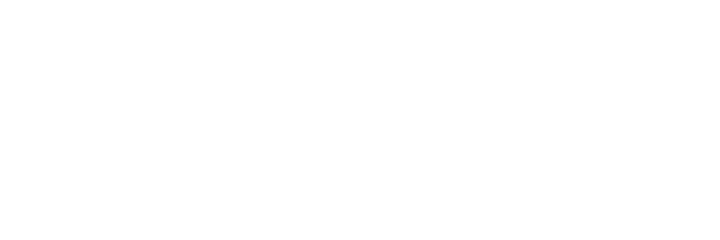

In [22]:
options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig >= 2)) +
geom_point(aes(nsig, precision, color=nmut)) + 
facet_wrap(~method)


options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig >= 2)) +
geom_point(aes(nsig, recall, color=nmut)) + 
facet_wrap(~method)

options(repr.plot.width=6, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig >= 2)) +
geom_point(aes(nsig, accuracy, color=nmut)) + 
facet_wrap(~method)

Warning message in Ops.factor(nsig, 5):
“‘>’ not meaningful for factors”ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'SMSE' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. prin

ERROR: Error in ggboxplot(d %>% filter(sigtype == 30 & nsig > 1 & nmut < 10000 & : could not find function "ggboxplot"


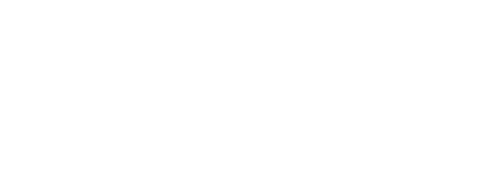

In [23]:
options(repr.plot.width=4, repr.plot.height=1.6)
ggplot(d %>% filter(sigtype==30 & nsig > 5)) +
geom_boxplot(aes(method, sqrt(SMSE), color=method)) 

options(repr.plot.width=3, repr.plot.height=2)
ggboxplot(d %>%
          filter(sigtype==30 & nsig > 1 & nmut < 10000 & method != 'mlez') %>%
          mutate(SRMSE=sqrt(SMSE)),
          x="method", y="SRMSE") + 
stat_compare_means(comparisons = list( c("ds", "mle")))

# options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==30 & nsig > 5)) +
geom_boxplot(aes(method, sqrt(PMSE), color=method))


In [ ]:
# tables:
d %>%
    filter(nmut < 50 & method != 'mlez') %>%
    mutate(SRMSE=sqrt(SMSE)) %>%
    group_by(sigtype, method) %>%
    summarise(
        n=n(),
        m=round(median(SRMSE), 3),
        sd=round(sd(SRMSE), 3)
    )


d %>%
    filter(nmut < 500 & nmut > 300 & method != 'mlez') %>%
    mutate(SRMSE=sqrt(SMSE)) %>%
    group_by(sigtype, method) %>%
    summarise(
        n=n(),
        m=round(median(SRMSE), 3),
        sd=round(sd(SRMSE), 3)
    )

d %>%
    filter(nmut > 800 & method != 'mlez') %>%
    mutate(SRMSE=sqrt(SMSE)) %>%
    group_by(sigtype, method) %>%
    summarise(
        n=n(),
        m=round(median(SRMSE), 3),
        sd=round(sd(SRMSE), 3)
    )

In [ ]:
d2 <- d %>%
    filter(
        nsig ==2 
    ) %>%
#     filter(
#         method != 'mlez') %>%
    mutate(
        signatures=sigtype,
    ) %>%
    group_by(s, nmut, method)

# tables:
d2  %>%
    summarise(
        n=n(),
        PRMSE=round(mean(PRMSE), 2),
        SRMSE=round(mean(SRMSE), 2),
        f1=round(mean(f1), 2),
        accuracy=round(mean(accuracy), 2),
        precision=round(mean(precision), 2),
        recall=round(mean(recall), 2)
    )



In [ ]:
options(repr.plot.width=3, repr.plot.height=2)
ggboxplot(d %>%
          filter( nsig > 1 & nmut < 10000 & method != 'mlez') %>%
          mutate(SRMSE=sqrt(SMSE)),
          x="method", y="accuracy") + 
stat_compare_means(comparisons = list( c("ds", "mle")))

options(repr.plot.width=3, repr.plot.height=2)
ggboxplot(d %>%
          filter( nsig > 1 & nmut < 10000 & method != 'mlez') %>%
          mutate(SRMSE=sqrt(SMSE)),
          x="method", y="precision") + 
stat_compare_means(comparisons = list( c("ds", "mle")))


options(repr.plot.width=3, repr.plot.height=2)
ggboxplot(d %>%
          filter( nsig > 1 & nmut < 10000 & method != 'mlez') %>%
          mutate(SRMSE=sqrt(SMSE)),
          x="method", y="recall") + 
stat_compare_means(comparisons = list( c("ds", "mle")))

#### 

In [ ]:
### options(repr.plot.width=4, repr.plot.height=1.6)
ggplot(d %>% filter(sigtype==10 & nsig > 2)) +
geom_boxplot(aes(method, precision, color=method))

# options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==10 & nsig > 2)) +
geom_boxplot(aes(method, recall, color=method))

ggplot(d %>% filter(sigtype==10 & nsig > 2)) +
geom_boxplot(aes(method, accuracy, color=method))

In [ ]:
d3 <- d  %>% spread(method, LLIK) %>%
mutate(
    ds=ds - LLIK0,
    mle = mle - LLIK0,
    mlez = mlez - LLIK0) %>%
gather(key = method, value, ds, mle, mlez, na.rm = TRUE)

options(repr.plot.width=5, repr.plot.height=2)
ggplot(d3 %>% filter(sigtype==30)) +
geom_boxplot(aes(method, value, color=method))

In [ ]:
options(repr.plot.width=4, repr.plot.height=1.6)
ggplot(d %>% filter(sigtype==5 & nmut > 40)) +
geom_boxplot(aes(method, precision, color=method))

# options(repr.plot.width=5, repr.plot.height=2)
ggplot(d %>% filter(sigtype==5 & nmut >50)) +
geom_boxplot(aes(method, recall, color=method))

ggplot(d %>% filter(sigtype==5 & nmut>50)) +
geom_boxplot(aes(method, accuracy, color=method))

In [ ]:
library(ggpubr)